#Задание
Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [ ]:
daily_total_female_births_in_cal = pd.read_csv('daily-total-female-births-in-cal.csv')
international_airline_passengers = pd.read_csv('international-airline-passengers.csv')
mean_monthly_air_temperature_deg = pd.read_csv('mean-monthly-air-temperature-deg.csv')
monthly_boston_armed_robberies = pd.read_csv('monthly-boston-armed-robberies-j.csv')
monthly_sales_of_company= pd.read_csv('monthly-sales-of-company-x-jan-6.csv')
weekly_closings_of_the_dowjones = pd.read_csv('weekly-closings-of-the-dowjones-.csv')

In [ ]:
all_series = {
    "Daily total female births in California": daily_total_female_births_in_cal["Count"],
    "International airline passengers: monthly totals in thousands": international_airline_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_air_temperature_deg["Deg"],
    "Monthly Boston armed robberies": monthly_boston_armed_robberies["Count"],
    "Monthly sales of company X": monthly_sales_of_company["Count"],
    "Weekly closings of the Dow-Jones industrial average": weekly_closings_of_the_dowjones["Close"],
}

# Функции

In [ ]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [ ]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

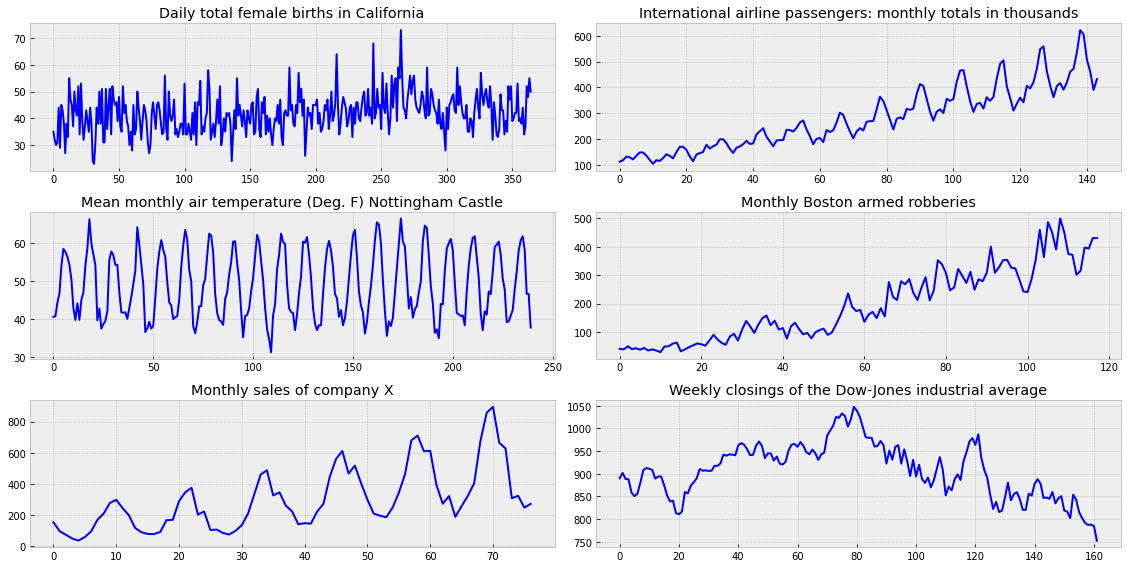

In [ ]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

# Series 1

In [ ]:
series_1 = pd.read_csv('daily-total-female-births-in-cal.csv')['Count']

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


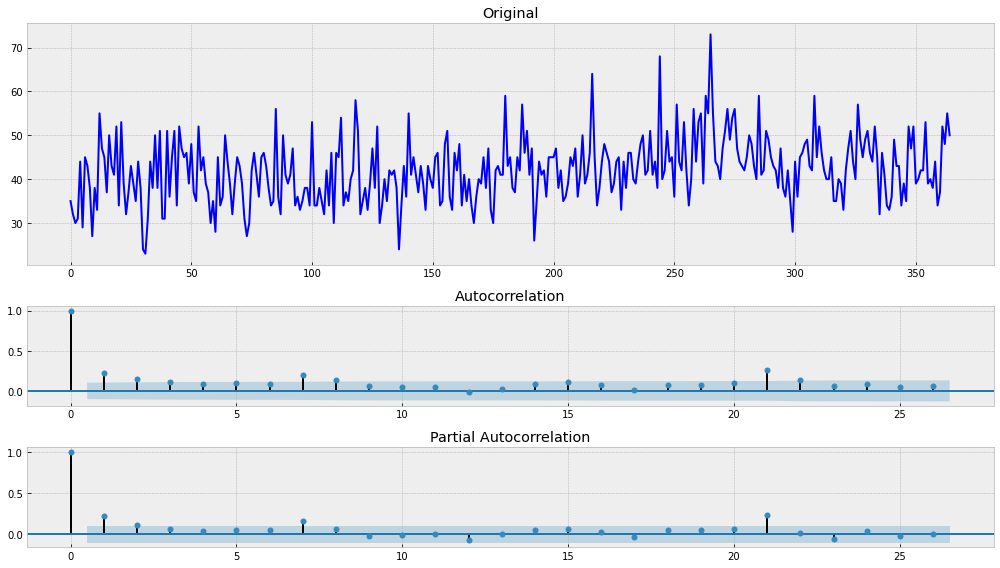

In [ ]:
tsplot(series_1)

In [ ]:
test_stationarity(series_1)

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


При таком низкои p-value и низком значние автокорреляции ряд считается стационарным 

# Series 2

In [ ]:
series_2 = pd.read_csv('international-airline-passengers.csv')['Count']

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


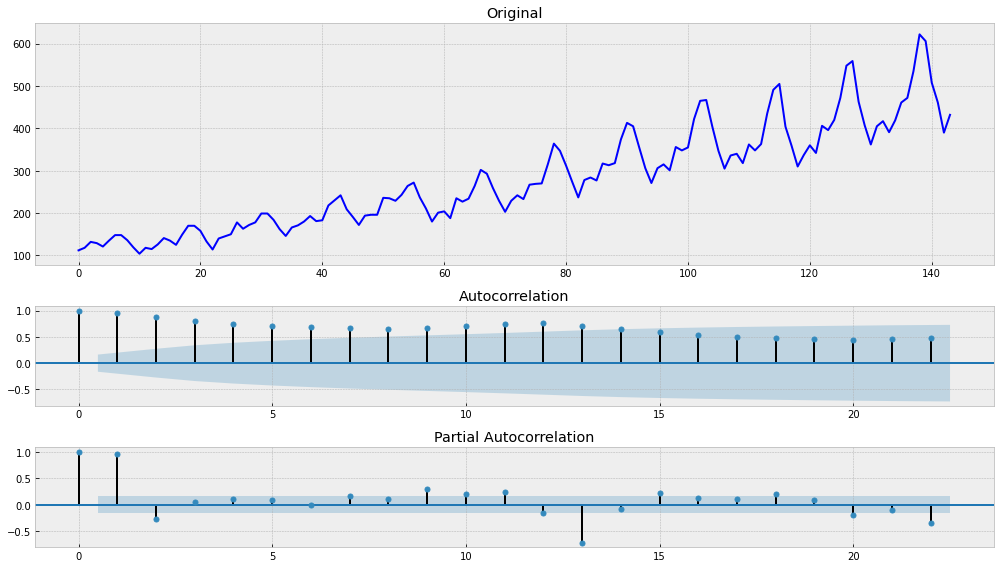

In [ ]:
tsplot(series_2)

С помощью логарифмирования уберем дисперсию

In [ ]:
series_2 = boxcox(series_2,0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


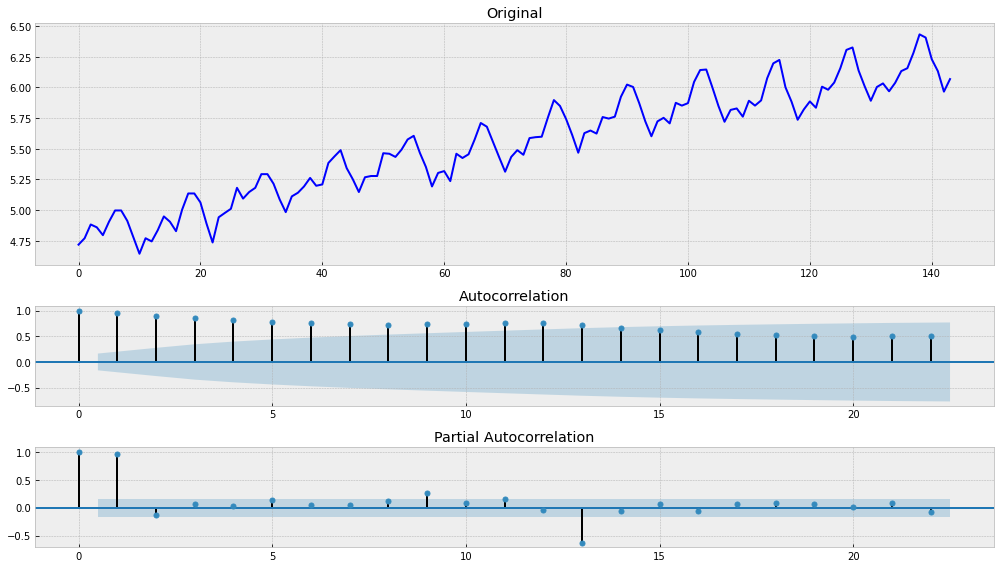

In [ ]:
tsplot(series_2)

С помощью дифференцирования избавимся от тренда

In [ ]:
series_2 = np.diff(series_2, 1)

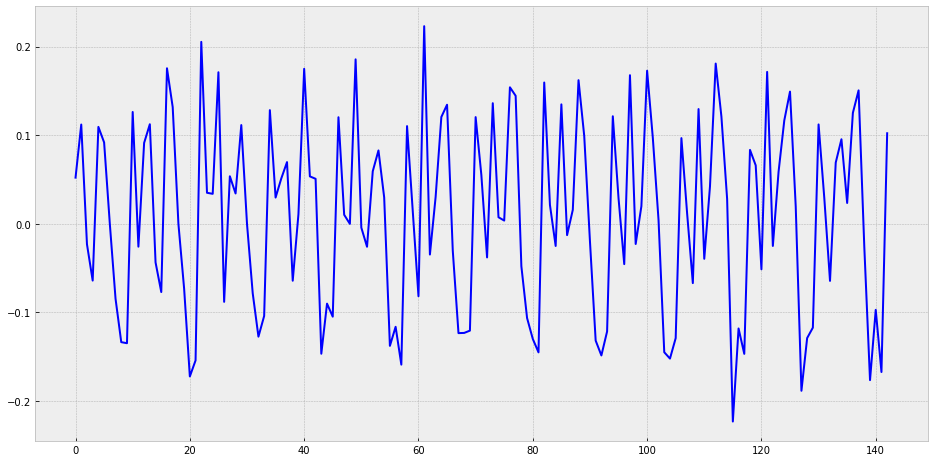

In [ ]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series_2, color='blue')

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


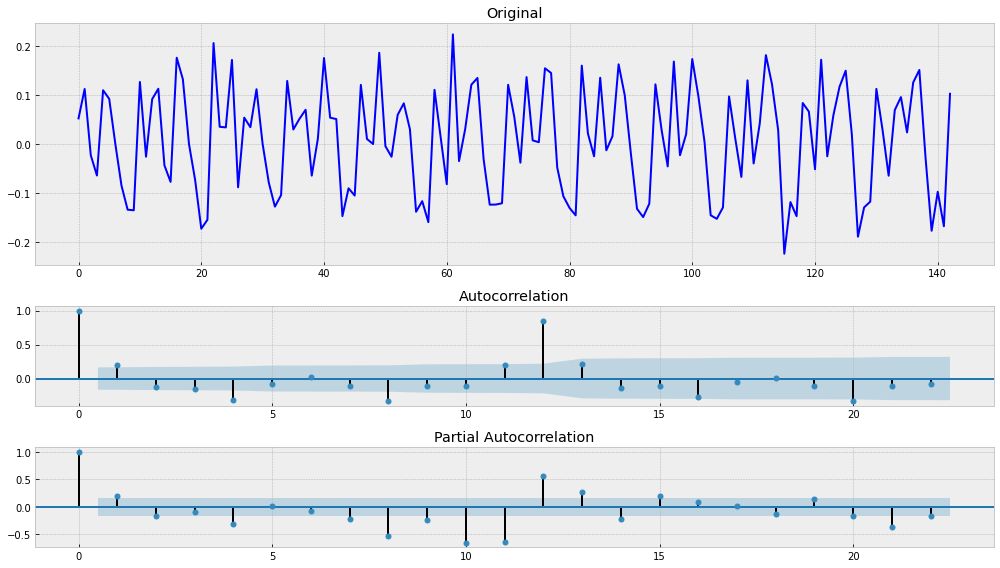

In [ ]:
tsplot(series_2)

На коррелограмме прослеживается сезонность 

In [ ]:
series_2 = series_2[12:] - series_2[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


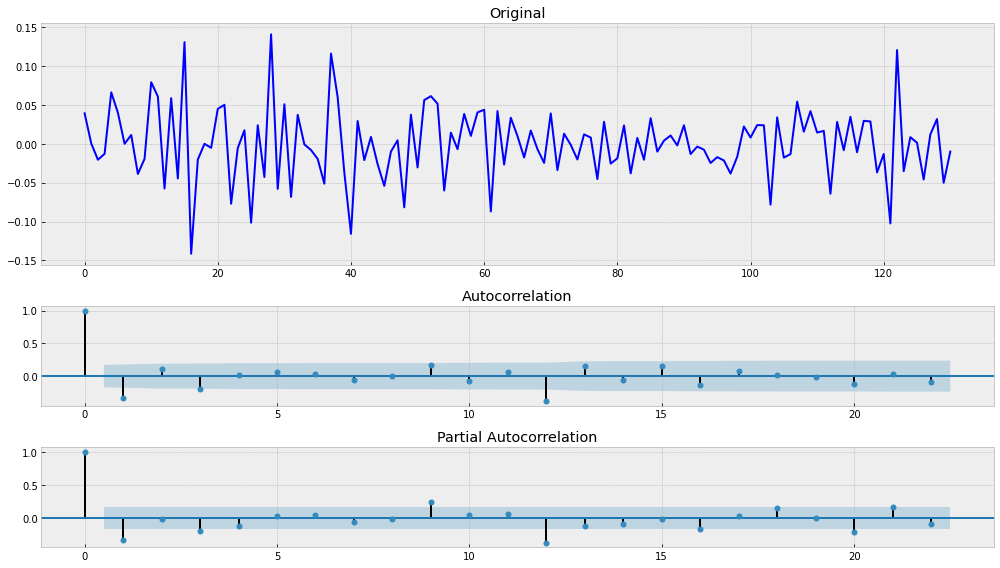

In [ ]:
tsplot(series_2)

In [ ]:
test_stationarity(series_2)

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


Тест Дики-Фуллера указывет на стационарность ряда. Избавились от тренда, сезонности и высокой автокорреляции

# Series 3

In [ ]:
series_3 = pd.read_csv('mean-monthly-air-temperature-deg.csv')["Deg"]

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


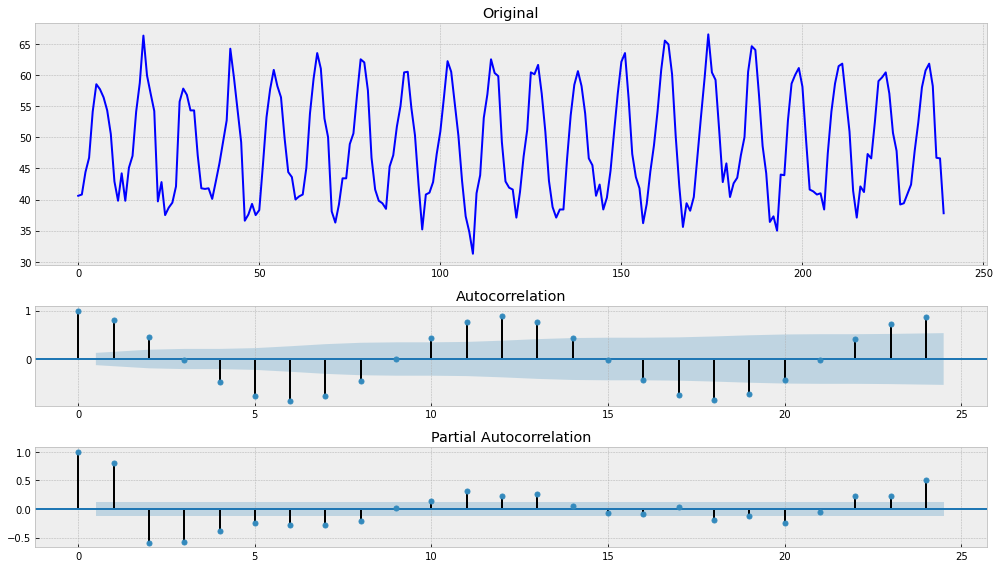

In [ ]:
tsplot(series_3)

In [ ]:
test_stationarity(series_3)

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


p-value 0.01, можно считать ряд стационарным

# Series 4

In [ ]:
series_4 = pd.read_csv('monthly-boston-armed-robberies-j.csv')["Count"]

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


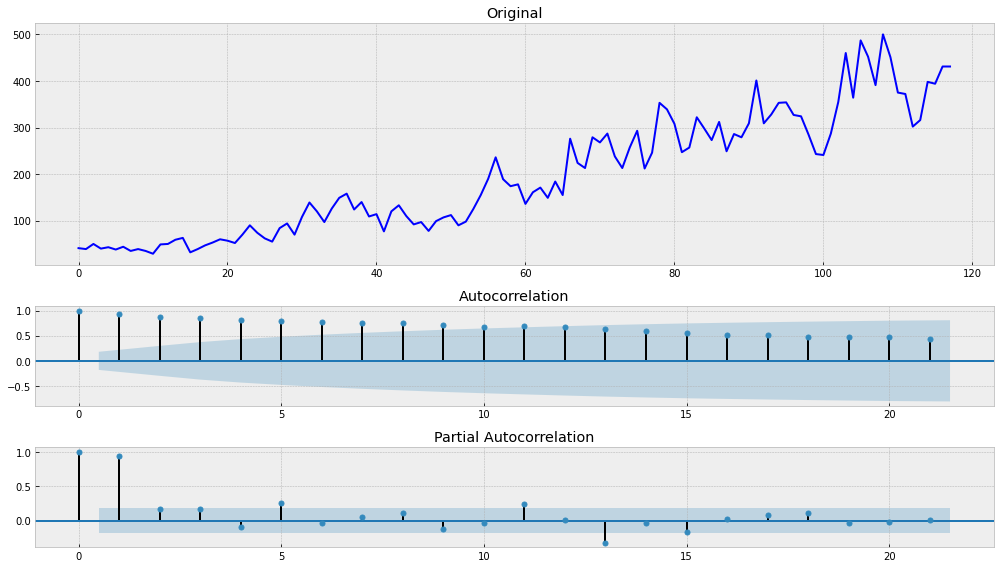

In [ ]:
tsplot(series_4)

In [ ]:
series_4 = boxcox(series_4, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


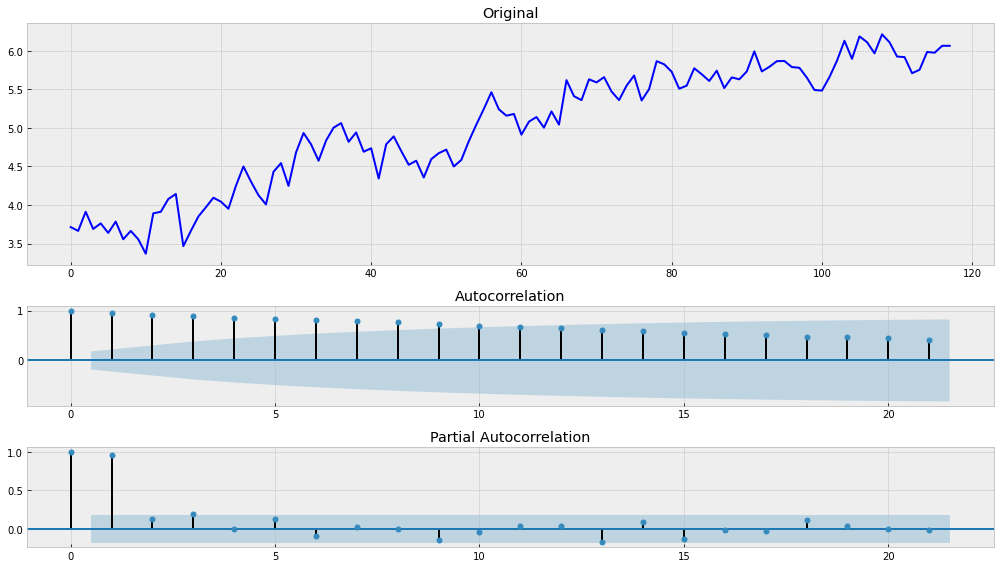

In [ ]:
tsplot(series_4)

In [ ]:
series_4 = series_4[7:] - series_4[:-7]

Results of Dickey-Fuller Test:
Test Statistic                 -3.412097
p-value                         0.010553
#Lags Used                     13.000000
Number of Observations Used    97.000000
Critical Value (1%)            -3.499637
Critical Value (5%)            -2.891831
Critical Value (10%)           -2.582928
dtype: float64


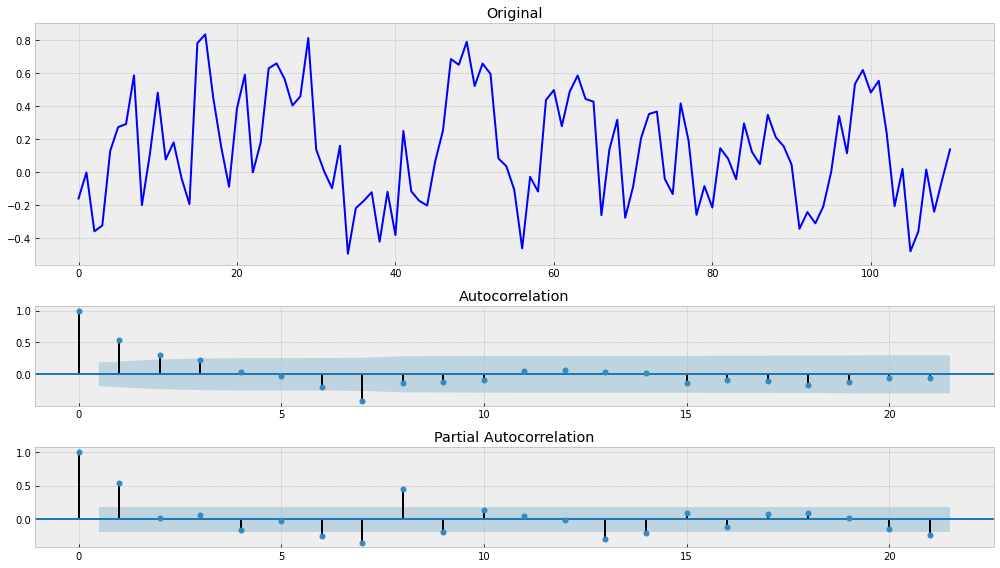

In [ ]:
tsplot(series_4)

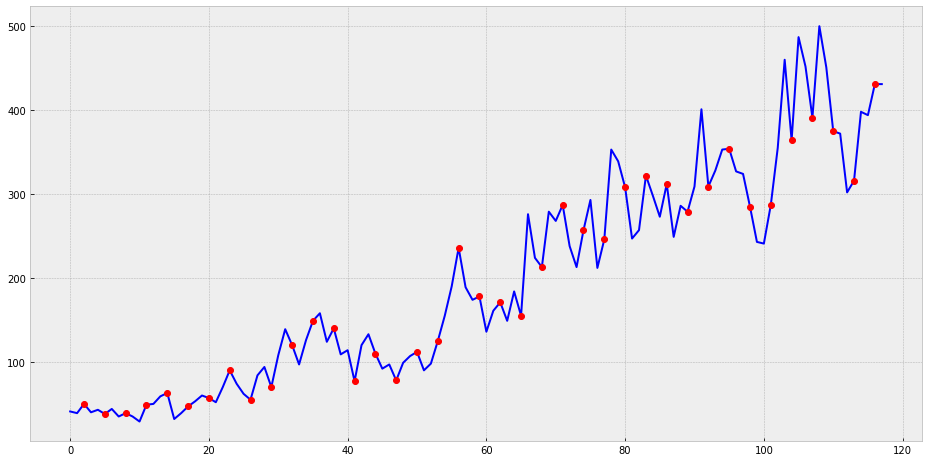

In [ ]:
plot_ts_and_points(monthly_boston_armed_robberies["Count"],2,3)

In [ ]:
test_stationarity(series_4)

Results of Dickey-Fuller Test:
Test Statistic                 -3.412097
p-value                         0.010553
#Lags Used                     13.000000
Number of Observations Used    97.000000
Critical Value (1%)            -3.499637
Critical Value (5%)            -2.891831
Critical Value (10%)           -2.582928
dtype: float64


Маленькая автокорреляция и низкое значенеи  теста указывают на стационарность

# Series 5

In [ ]:
series_5 = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')['Count']

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


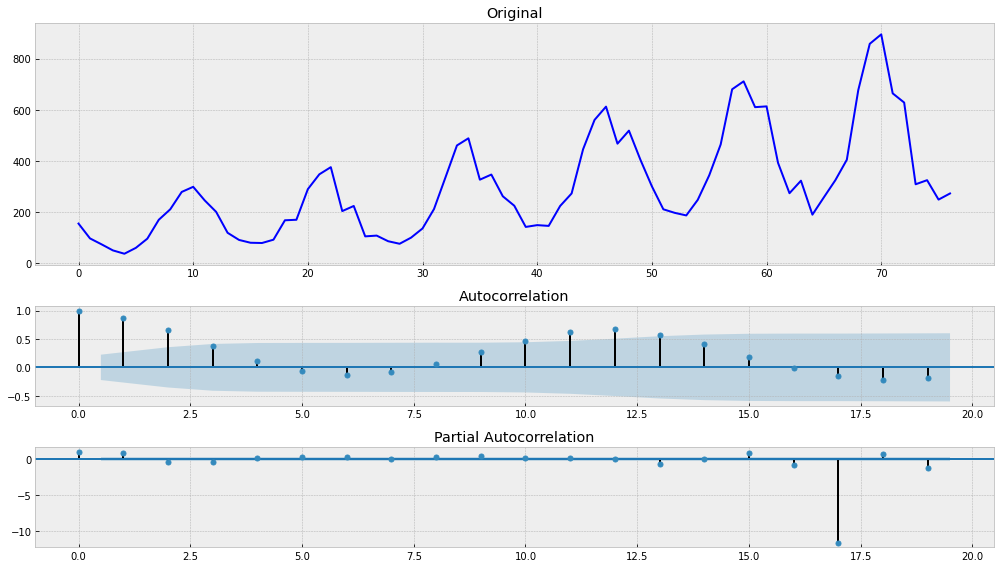

In [ ]:
tsplot(series_5)

In [ ]:
series_5 = boxcox(series_5,0)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


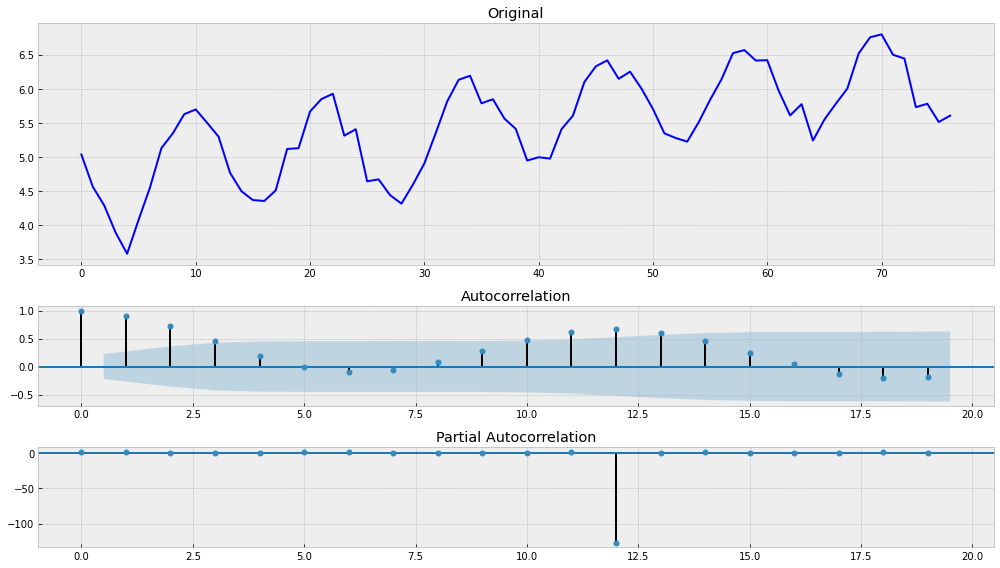

In [ ]:
tsplot(series_5)

In [ ]:
series_5 = np.diff(series_5, 1)

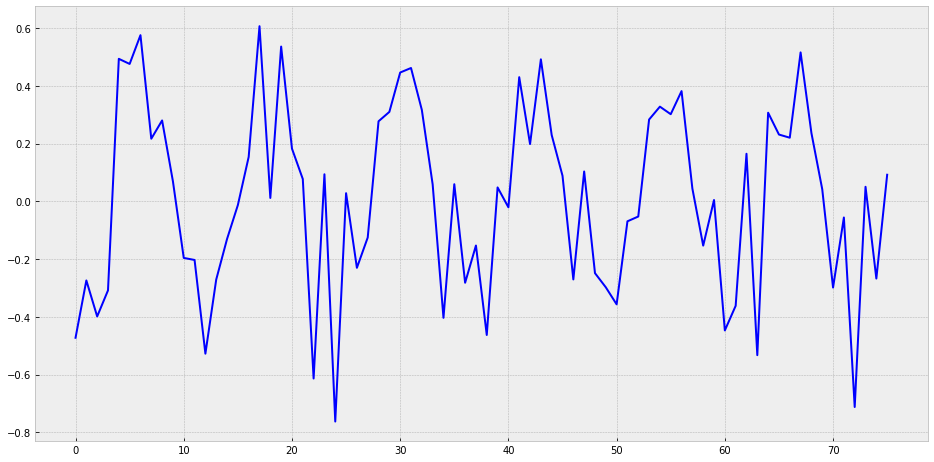

In [ ]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series_5, color='blue')

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


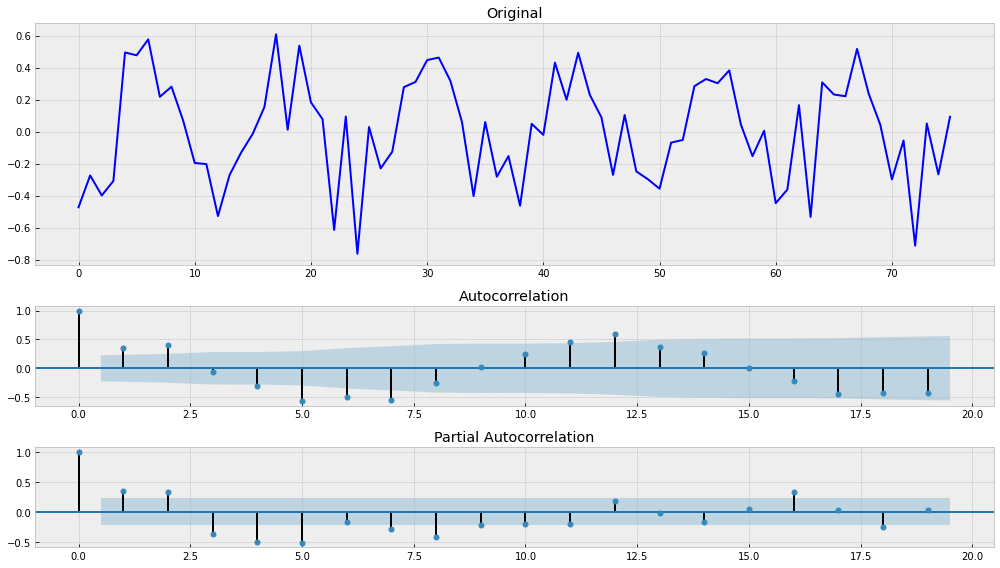

In [ ]:
tsplot(series_5)

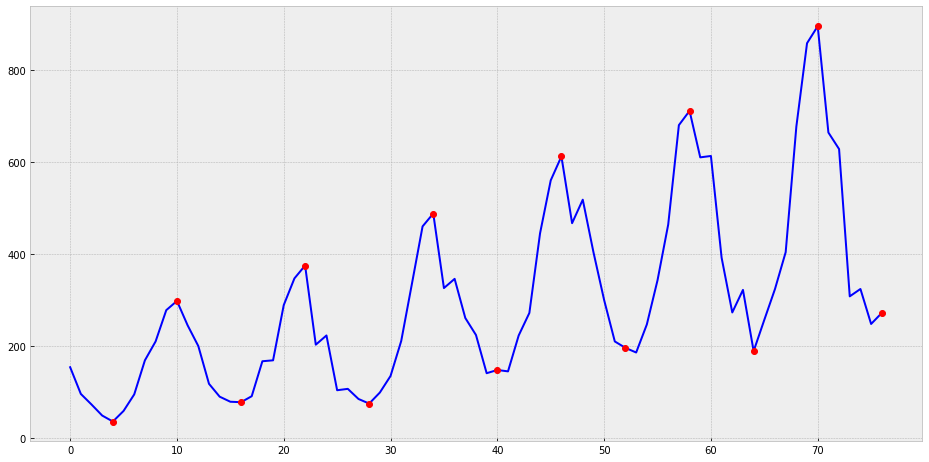

In [ ]:
plot_ts_and_points(monthly_sales_of_company["Count"],4,6)

In [ ]:
test_stationarity(series_5)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


Здесь добились стационарности

# Series 6

In [ ]:
series_6 = pd.read_csv('weekly-closings-of-the-dowjones-.csv')["Close"]

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


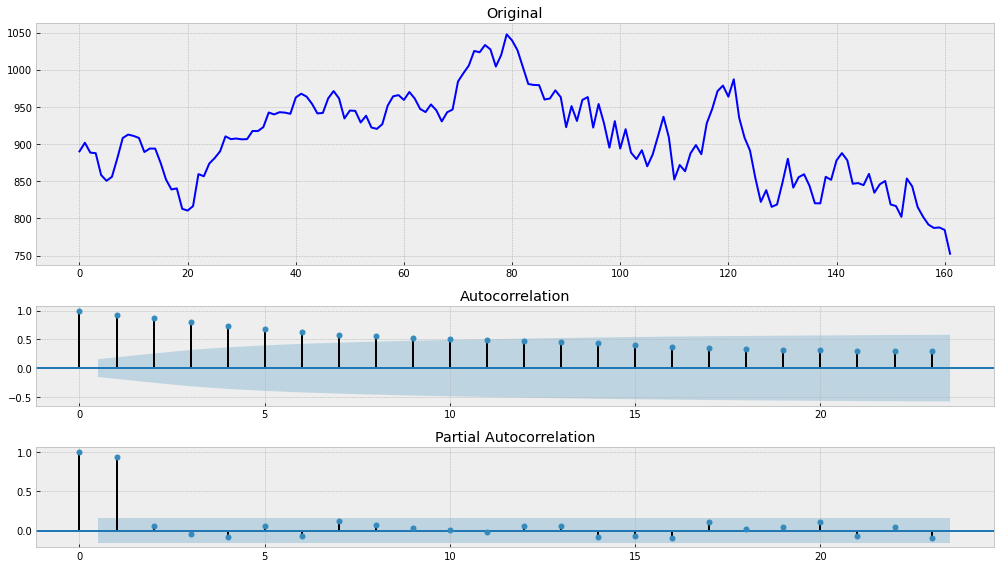

In [ ]:
tsplot(series_6)

In [ ]:
series_6 = boxcox(series_6, 5)

In [ ]:
series_6 = series_6[1:] - series_6[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -3.242550
p-value                          0.017650
#Lags Used                       6.000000
Number of Observations Used    155.000000
Critical Value (1%)             -3.473259
Critical Value (5%)             -2.880374
Critical Value (10%)            -2.576812
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


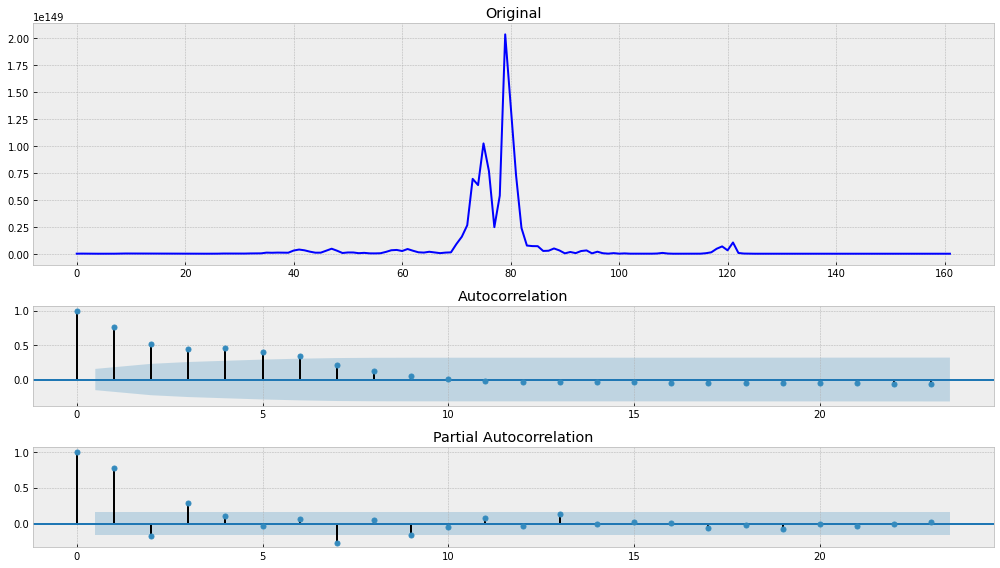

In [ ]:
tsplot(series_6)

In [ ]:
test_stationarity(series_6)

Results of Dickey-Fuller Test:
Test Statistic                  -3.242550
p-value                          0.017650
#Lags Used                       6.000000
Number of Observations Used    155.000000
Critical Value (1%)             -3.473259
Critical Value (5%)             -2.880374
Critical Value (10%)            -2.576812
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


Ряд стационарен